In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Installing uproot
!pip install uproot awkward lz4 xxhash

In [ ]:
#Importing uproot, numpy, and matplotlib
import uproot
from numpy import *
import matplotlib.pyplot as plt

In [ ]:
#Assigning the dataset into a variable
from google.colab import drive
drive.mount('/content/drive')
f = uproot.open ("/content/drive/MyDrive/B2HHH_MagnetUp.root: DecayTree")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Retrieving the 3-space momentum of each daughter particle
Px_H1 = f["H1_PX"].array(library="np")
Py_H1 =f["H1_PY"].array(library="np")
Pz_H1 = f["H1_PZ"].array(library="np")

Ptot_H1 = sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)

Px_H2 = f["H2_PX"].array(library="np")
Py_H2 = f["H2_PY"].array(library="np")
Pz_H2 = f["H2_PZ"].array(library="np")

Px_H3 = f["H3_PX"].array(library="np")
Py_H3 = f["H3_PY"].array(library="np")
Pz_H3 = f["H3_PZ"].array(library="np")

#Constructing the total momentum of the B meson
M_Ptot = sqrt((Px_H1 + Py_H1 + Pz_H1)**2 + (Px_H2 + Py_H2 + Pz_H2)**2 + (Px_H3 + Py_H3 + Pz_H3)**2)


Text(0.5, 0, 'Mass ($Mev/c^2$)')

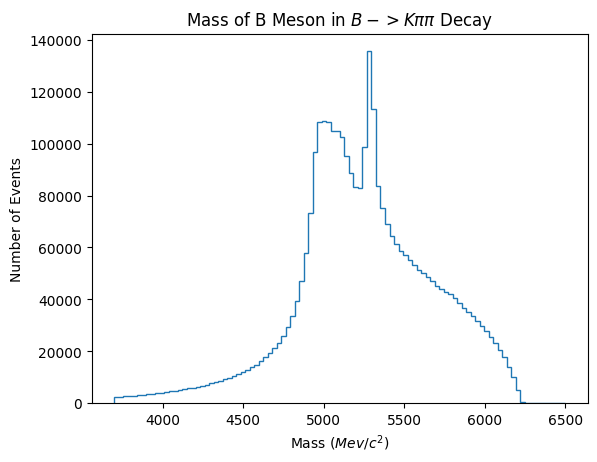

In [ ]:
#Mass of a Kaon in MeV/c^2
mass_K = 493.677
#Mass of Pion in MeV/c^2
mass_pi = 135

#Constructing the mass of each daughter particle in the B->Kpipi decay
E_H1TOT = sqrt(mass_pi**2 + sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)**2)
E_H2TOT = sqrt(mass_K**2 + sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)**2)
E_H3TOT = sqrt(mass_pi**2 + sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)**2)

#Constructing the total energy of the B meson
E_TOT = E_H1TOT + E_H2TOT + E_H3TOT

#Constructing the total momentum of the B meson
P_TOT = sqrt((Px_H1 + Px_H2 + Px_H3)**2 + (Py_H1 + Py_H2 + Py_H3)**2 + (Pz_H1 + Pz_H2 + Pz_H3)**2)

#Using m^2 = E^2-p^2 to find invariant mass of B meson
mass_mother = sqrt(E_TOT**2 - P_TOT**2)

#Plotting the B meson's mass
plt.hist(mass_mother,100, range = [3700,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in $B->K\pi\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

Text(0.5, 0, 'Mass ($Mev/c^2$)')

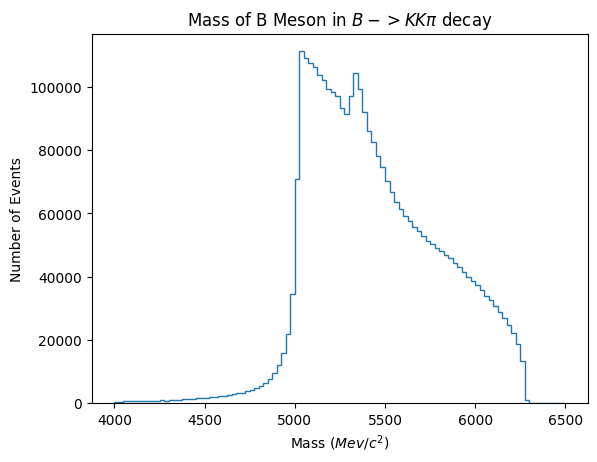

In [ ]:

#Constructing the mass of each daughter particle in the B->KKpi decay
E_H1TOT2 = sqrt(mass_K**2 + sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)**2)
E_H2TOT2 = sqrt(mass_K**2 + sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)**2)
E_H3TOT2 = sqrt(mass_pi**2 + sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)**2)

#Constructing the total energy of the B meson
E_TOT2 = E_H1TOT2 + E_H2TOT2 + E_H3TOT2

#Constructing the total momentum of the B meson
P_TOT2 = sqrt((Px_H1 + Px_H2 + Px_H3)**2 + (Py_H1 + Py_H2 + Py_H3)**2 + (Pz_H1 + Pz_H2 + Pz_H3)**2)

#Using m^2 = E^2-p^2 to find invariant mass of B meson
mass_mother2 = sqrt(E_TOT2**2 - P_TOT2**2)


#Plotting the mass for the B->KKpi decay
plt.hist(mass_mother2,100, range = [4000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in $B->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

In [ ]:
#Separating the full data into B+ and B-
Full_Tree_minusKPP = f.arrays(cut="(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Full_Tree_plusKPP = f.arrays(cut="(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_Full_minusKPP = sqrt(mass_pi**2 + sqrt(Full_Tree_minusKPP["H1_PX"]**2 + Full_Tree_minusKPP["H1_PY"]**2 + Full_Tree_minusKPP["H1_PZ"]**2)**2)
E_H2TOT_Full_minusKPP = sqrt(mass_K**2 + sqrt(Full_Tree_minusKPP["H2_PX"]**2 + Full_Tree_minusKPP["H2_PY"]**2 + Full_Tree_minusKPP["H2_PZ"]**2)**2)
E_H3TOT_Full_minusKPP = sqrt(mass_pi**2 + sqrt(Full_Tree_minusKPP["H3_PX"]**2 + Full_Tree_minusKPP["H3_PY"]**2 + Full_Tree_minusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Full_minusKPP = E_H1TOT_Full_minusKPP + E_H2TOT_Full_minusKPP + E_H3TOT_Full_minusKPP

#Assigning the total cut momentum into a variable
P_TOTFull_minusKPP = sqrt((Full_Tree_minusKPP["H1_PX"] + Full_Tree_minusKPP["H2_PX"] + Full_Tree_minusKPP["H3_PX"])**2 + (Full_Tree_minusKPP["H1_PY"] + Full_Tree_minusKPP["H2_PY"] + Full_Tree_minusKPP["H3_PY"])**2 + (Full_Tree_minusKPP["H1_PZ"] + Full_Tree_minusKPP["H2_PZ"] + Full_Tree_minusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Full_minusKPP = sqrt(E_TOT_Full_minusKPP**2 - P_TOTFull_minusKPP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_Full_plusKPP = sqrt(mass_pi**2 + sqrt(Full_Tree_plusKPP["H1_PX"]**2 + Full_Tree_plusKPP["H1_PY"]**2 + Full_Tree_plusKPP["H1_PZ"]**2)**2)
E_H2TOT_Full_plusKPP = sqrt(mass_K**2 + sqrt(Full_Tree_plusKPP["H2_PX"]**2 + Full_Tree_plusKPP["H2_PY"]**2 + Full_Tree_plusKPP["H2_PZ"]**2)**2)
E_H3TOT_Full_plusKPP = sqrt(mass_pi**2 + sqrt(Full_Tree_plusKPP["H3_PX"]**2 + Full_Tree_plusKPP["H3_PY"]**2 + Full_Tree_plusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Full_plusKPP = E_H1TOT_Full_plusKPP + E_H2TOT_Full_plusKPP + E_H3TOT_Full_plusKPP

#Assigning the total cut momentum into a variable
P_TOTFull_plusKPP = sqrt((Full_Tree_plusKPP["H1_PX"] + Full_Tree_plusKPP["H2_PX"] + Full_Tree_plusKPP["H3_PX"])**2 + (Full_Tree_plusKPP["H1_PY"] + Full_Tree_plusKPP["H2_PY"] + Full_Tree_plusKPP["H3_PY"])**2 + (Full_Tree_plusKPP["H1_PZ"] + Full_Tree_plusKPP["H2_PZ"] + Full_Tree_plusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Full_plusKPP = sqrt(E_TOT_Full_plusKPP**2 - P_TOTFull_plusKPP**2)

Text(0.5, 0, 'Mass ($Mev/c^2$)')

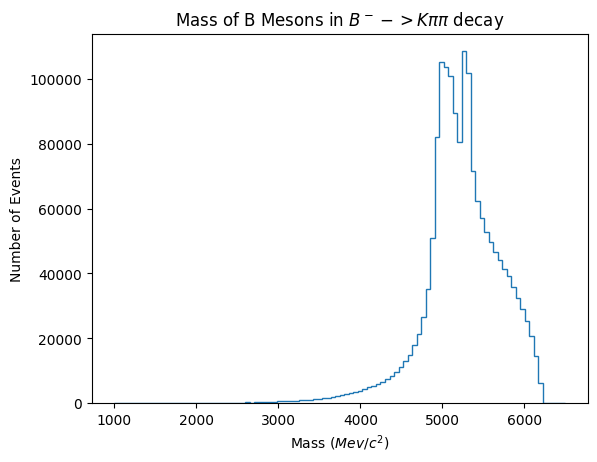

In [ ]:
#Plotting the full mass of B- -> Kpipi
plt.hist(mass_mother_Full_minusKPP,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Mesons in $B^- ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

Text(0.5, 0, 'Mass ($Mev/c^2$)')

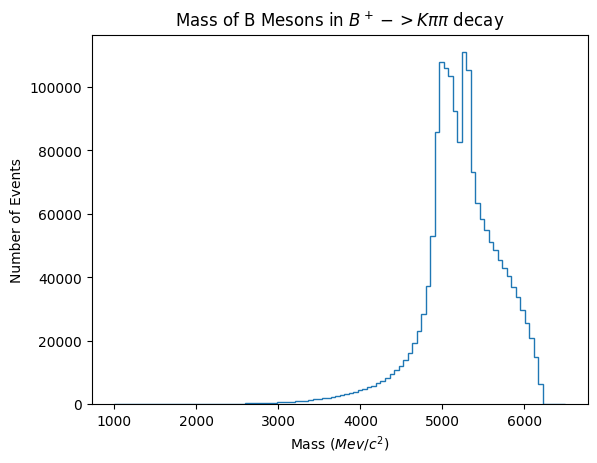

In [ ]:
#Plotting the full mass of B+ -> Kpipi
plt.hist(mass_mother_Full_plusKPP,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Mesons in $B^+ ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

In [ ]:
#So I'm separating the data into B+ and B- data of the B -> Kpipi decay
Tree_Cut_minusKPP = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK<0.9)&(H1_ProbPi>0.1)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Tree_Cut_plusKPP = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK<0.9)&(H1_ProbPi>0.1)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_Cut_minusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_minusKPP["H1_PX"]**2 + Tree_Cut_minusKPP["H1_PY"]**2 + Tree_Cut_minusKPP["H1_PZ"]**2)**2)
E_H2TOT_Cut_minusKPP = sqrt(mass_K**2 + sqrt(Tree_Cut_minusKPP["H2_PX"]**2 + Tree_Cut_minusKPP["H2_PY"]**2 + Tree_Cut_minusKPP["H2_PZ"]**2)**2)
E_H3TOT_Cut_minusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_minusKPP["H3_PX"]**2 + Tree_Cut_minusKPP["H3_PY"]**2 + Tree_Cut_minusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_minusKPP = E_H1TOT_Cut_minusKPP + E_H2TOT_Cut_minusKPP + E_H3TOT_Cut_minusKPP

#Assigning the total cut momentum into a variable
P_TOTCUT_minusKPP = sqrt((Tree_Cut_minusKPP["H1_PX"] + Tree_Cut_minusKPP["H2_PX"] + Tree_Cut_minusKPP["H3_PX"])**2 + (Tree_Cut_minusKPP["H1_PY"] + Tree_Cut_minusKPP["H2_PY"] + Tree_Cut_minusKPP["H3_PY"])**2 + (Tree_Cut_minusKPP["H1_PZ"] + Tree_Cut_minusKPP["H2_PZ"] + Tree_Cut_minusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Cut_minusKPP = sqrt(E_TOT_Cut_minusKPP**2 - P_TOTCUT_minusKPP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_Cut_plusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_plusKPP["H1_PX"]**2 + Tree_Cut_plusKPP["H1_PY"]**2 + Tree_Cut_plusKPP["H1_PZ"]**2)**2)
E_H2TOT_Cut_plusKPP = sqrt(mass_K**2 + sqrt(Tree_Cut_plusKPP["H2_PX"]**2 + Tree_Cut_plusKPP["H2_PY"]**2 + Tree_Cut_plusKPP["H2_PZ"]**2)**2)
E_H3TOT_Cut_plusKPP = sqrt(mass_pi**2 + sqrt(Tree_Cut_plusKPP["H3_PX"]**2 + Tree_Cut_plusKPP["H3_PY"]**2 + Tree_Cut_plusKPP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_plusKPP = E_H1TOT_Cut_plusKPP + E_H2TOT_Cut_plusKPP + E_H3TOT_Cut_plusKPP

#Assigning the total cut momentum into a variable
P_TOTCUT_plusKPP = sqrt((Tree_Cut_plusKPP["H1_PX"] + Tree_Cut_plusKPP["H2_PX"] + Tree_Cut_plusKPP["H3_PX"])**2 + (Tree_Cut_plusKPP["H1_PY"] + Tree_Cut_plusKPP["H2_PY"] + Tree_Cut_plusKPP["H3_PY"])**2 + (Tree_Cut_plusKPP["H1_PZ"] + Tree_Cut_plusKPP["H2_PZ"] + Tree_Cut_plusKPP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Cut_plusKPP = sqrt(E_TOT_Cut_plusKPP**2 - P_TOTCUT_plusKPP**2)

Text(0.5, 0, 'Mass ($Mev/c^2$)')

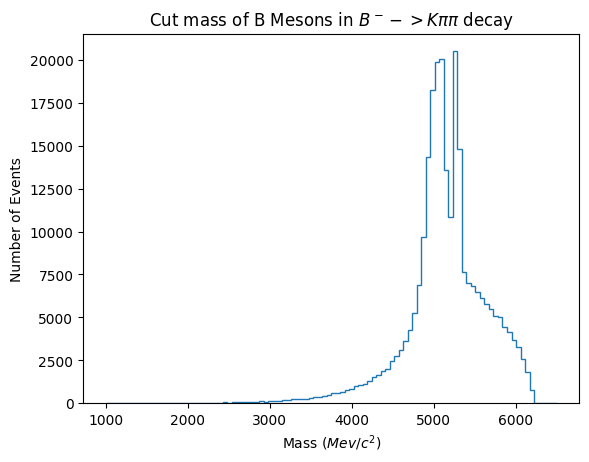

In [ ]:
#Plotting the full mass of B- -> Kpipi
plt.hist(mass_mother_Cut_minusKPP,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Mesons in $B^- ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

Text(0.5, 0, 'Mass ($Mev/c^2$)')

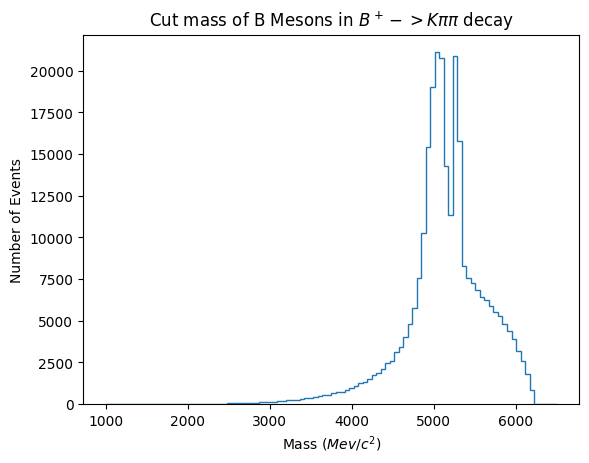

In [ ]:
#Plotting the full mass of B- -> Kpipi
plt.hist(mass_mother_Cut_plusKPP,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Mesons in $B^+ ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

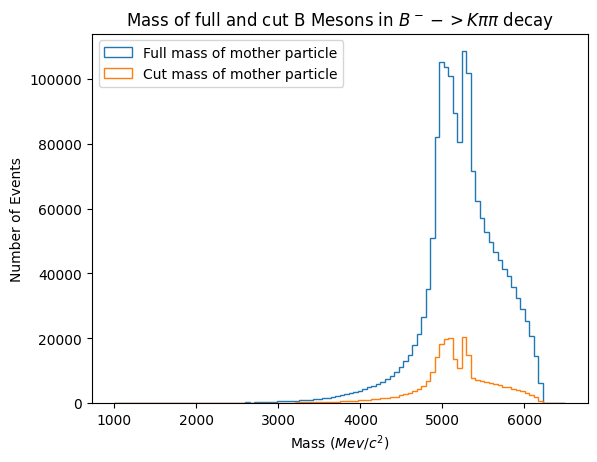

In [ ]:
#Superimposing the mass plots of the full and cut masses of the B- -> Kpipi decay
plt.hist(mass_mother_Full_minusKPP,100, range = [1000,6500], histtype = u'step', label="Full mass of mother particle")
plt.title("Mass of full and cut B Mesons in B- -> Kpipi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(mass_mother_Cut_minusKPP,100, range = [1000,6500], histtype = u'step', label="Cut mass of mother particle")
plt.title("Mass of full and cut B Mesons in $B^- -> K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

plt.legend(loc = "upper left")

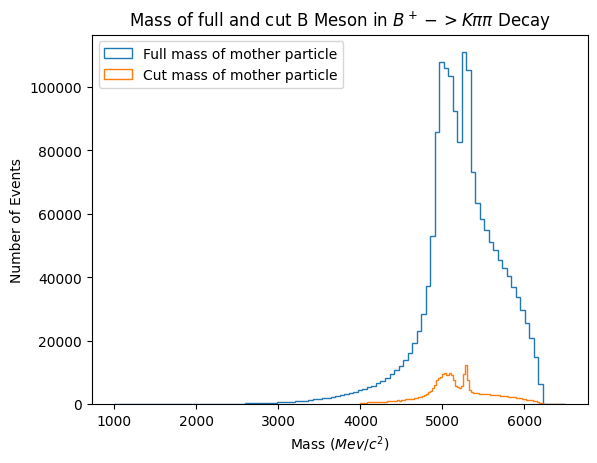

In [ ]:
#Superimposing the mass plots of the full and cut masses of the B+ -> Kpipi decay
plt.hist(mass_mother_Full_plusKPP,100, range = [1000,6500], histtype = u'step', label="Full mass of mother particle")
plt.title("Mass of full and cut B Meson in B+ ->Kpipi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(mass_mother_Cut_plusKPP,100, range = [4000,6500], histtype = u'step', label="Cut mass of mother particle")
plt.title("Mass of full and cut B Meson in $B^+ ->K\pi\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

plt.legend(loc = "upper left")

In [ ]:
#Counting the number of events
Events_KPPplus = len(mass_mother_Cut_plusKPP)
Events_KPPminus = len(mass_mother_Cut_minusKPP)

print("Number of B+ ->Kpipi events after cut is: " + str(Events_KPPplus))
print("Number of B- ->Kpipi events after cut is: " + str(Events_KPPminus))

Number of B+ ->Kpipi events after cut is: 283143
Number of B- ->Kpipi events after cut is: 265635


In [ ]:
#sectioning the full mass of the B- -> Kpipi
A_ONE_fullKPPminus = []
A_TWO_fullKPPminus = []
A_THREE_fullKPPminus = []

for venti in mass_mother_Full_minusKPP:
  if venti > 0 and venti <= 4800:
    A_ONE_fullKPPminus.append(venti)
  elif venti > 4800 and venti <=5300:
    A_TWO_fullKPPminus.append(venti)
  else:
    A_THREE_fullKPPminus.append(venti)




In [ ]:
#Plotting each section together
plt.hist(A_ONE_fullKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_fullKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_fullKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full mass of B Meson in $B^- ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

In [ ]:
#Sectioning the cut mass of B- -> Kpipi

A_ONE_cutKPPminus = []
A_TWO_cutKPPminus = []
A_THREE_cutKPPminus = []

for grande in mass_mother_Cut_minusKPP:
  if grande > 0 and grande <= 4800:
    A_ONE_cutKPPminus.append(grande)
  elif grande > 4800 and grande <=5300:
    A_TWO_cutKPPminus.append(grande)
  else:
    A_THREE_cutKPPminus.append(grande)

In [ ]:
#Plotting each section together
plt.hist(A_ONE_cutKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_cutKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_cutKPPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^- ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

In [ ]:
#Calculating the selection efficiencies for the B- -> Kpipi

sel_eff_KPPBminus_one = len(A_ONE_cutKPPminus)/float(len(A_ONE_fullKPPminus))
print("The selection efficiency for the left tail of the B- -> Kpipi is: " + str(sel_eff_KPPBminus_one))

sel_eff_KPPBminus_two = len(A_TWO_cutKPPminus)/float(len(A_TWO_fullKPPminus))
print("The selection efficiency for the peak of the B- -> Kpipi is: " + str(sel_eff_KPPBminus_two))

sel_eff_KPPBminus_three = len(A_THREE_cutKPPminus)/float(len(A_THREE_fullKPPminus))
print("The selection efficiency for the right tail of the B- -> Kpipi is: " + str(sel_eff_KPPBminus_three))

#Calculating full selection efficiency
percent_rightminus = len(A_ONE_cutKPPminus)/float(len(mass_mother_Cut_minusKPP))
percent_peakminus = len(A_TWO_cutKPPminus)/float(len(mass_mother_Cut_minusKPP))
percent_leftminus = len(A_THREE_cutKPPminus)/float(len(mass_mother_Cut_minusKPP))

print(percent_rightminus)
print(percent_peakminus)
print(percent_leftminus)

full_sel_effKPPminus = (sel_eff_KPPBminus_one*percent_rightminus)+(sel_eff_KPPBminus_two*percent_peakminus)+(sel_eff_KPPBminus_three)*percent_leftminus
print("the full sel efficiency is: " + str(full_sel_effKPPminus))

In [ ]:
#Sectioning the full mass of B+ -> Kpipi
A_ONE_fullKPPplus = []
A_TWO_fullKPPplus = []
A_THREE_fullKPPplus = []

for mocha in mass_mother_Full_plusKPP:
  if mocha > 0 and mocha <= 4800:
    A_ONE_fullKPPplus.append(mocha)
  elif mocha > 4800 and mocha <=5300:
    A_TWO_fullKPPplus.append(mocha)
  else:
    A_THREE_fullKPPplus.append(mocha)

In [ ]:
#Plotting each section together
plt.hist(A_ONE_fullKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_fullKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_fullKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full mass of B Meson in $B^+ ->K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Sectioning the cut mass of B+ -> Kpipi

A_ONE_cutKPPplus = []
A_TWO_cutKPPplus = []
A_THREE_cutKPPplus = []

for cappucino in mass_mother_Cut_plusKPP:
  if cappucino > 0 and cappucino <= 4800:
    A_ONE_cutKPPplus.append(cappucino)
  elif cappucino > 4800 and cappucino <=5300:
    A_TWO_cutKPPplus.append(cappucino)
  else:
    A_THREE_cutKPPplus.append(cappucino)

In [ ]:
#Plotting each section together
plt.hist(A_ONE_cutKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_cutKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_cutKPPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^+ -> K\pi\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Calculating the selection efficiencies for the B+ -> Kpipi

sel_eff_KPPBplus_one = len(A_ONE_cutKPPplus)/float(len(A_ONE_fullKPPplus))
print("The selection efficiency for the left tail of the B+ -> Kpipi is: " + str(sel_eff_KPPBplus_one))

sel_eff_KPPBplus_two = len(A_TWO_cutKPPplus)/float(len(A_TWO_fullKPPplus))
print("The selection efficiency for the peak of the B+ -> Kpipi is: " + str(sel_eff_KPPBplus_two))

sel_eff_KPPBplus_three = len(A_THREE_cutKPPplus)/float(len(A_THREE_fullKPPplus))
print("The selection efficiency for the right tail of the B+ -> Kpipi is: " + str(sel_eff_KPPBplus_three))

#Calculating full selection efficiency
percent_rightplus = len(A_ONE_cutKPPplus)/float(len(mass_mother_Cut_plusKPP))
percent_peakplus = len(A_TWO_cutKPPplus)/float(len(mass_mother_Cut_plusKPP))
percent_leftplus = len(A_THREE_cutKPPplus)/float(len(mass_mother_Cut_plusKPP))

full_sel_effKPPplus = (sel_eff_KPPBplus_one*percent_rightplus)+(sel_eff_KPPBplus_two*percent_peakplus)+(sel_eff_KPPBplus_three)*percent_leftplus
print("the full sel efficiency is: " + str(full_sel_effKPPplus))

In [ ]:
#Getting the masses of each daughter particle in B->Kpipi (plus)

Ptot_H1plus = sqrt((Tree_Cut_plusKPP["H1_PX"] + Tree_Cut_plusKPP["H1_PY"] + Tree_Cut_plusKPP["H1_PZ"])**2)
Ptot_H2plus = sqrt((Tree_Cut_plusKPP["H2_PX"] + Tree_Cut_plusKPP["H2_PY"] + Tree_Cut_plusKPP["H2_PZ"])**2)
Ptot_H3plus = sqrt((Tree_Cut_plusKPP["H3_PX"] + Tree_Cut_plusKPP["H3_PY"] + Tree_Cut_plusKPP["H3_PZ"])**2)

mass_Kaonplus = sqrt(E_H1TOT_Cut_plusKPP**2 - Ptot_H1plus**2)
mass_Pion1plus = sqrt(E_H2TOT_Cut_plusKPP**2 - Ptot_H2plus**2)
mass_Pion2plus = sqrt(E_H3TOT_Cut_plusKPP**2 - Ptot_H3plus**2)

In [ ]:
#Trying to get rid of the NaN for B+

cleaned_MKplus = []

for one in mass_Kaonplus:
  if one > 0:
    cleaned_MKplus.append(one)

cleaned_MP1plus = []

for two in mass_Pion1plus:
  if two > 0:
    cleaned_MP1plus.append(two)

cleaned_MP2plus = []

for three in mass_Pion2plus:
  if three > 0:
    cleaned_MP2plus.append(three)

print (len(cleaned_MKplus))
print (len(cleaned_MP1plus))
print (len(cleaned_MP2plus))


In [ ]:
#Getting the masses of each daughter particle in B->Kpipi (minus)

Ptot_H1minus = sqrt((Tree_Cut_minusKPP["H1_PX"] + Tree_Cut_minusKPP["H1_PY"] + Tree_Cut_minusKPP["H1_PZ"])**2)
Ptot_H2minus = sqrt((Tree_Cut_minusKPP["H2_PX"] + Tree_Cut_minusKPP["H2_PY"] + Tree_Cut_minusKPP["H2_PZ"])**2)
Ptot_H3minus = sqrt((Tree_Cut_minusKPP["H3_PX"] + Tree_Cut_minusKPP["H3_PY"] + Tree_Cut_minusKPP["H3_PZ"])**2)

mass_Kaonminus = sqrt(E_H1TOT_Cut_minusKPP**2 - Ptot_H1minus**2)
mass_Pion1minus = sqrt(E_H2TOT_Cut_minusKPP**2 - Ptot_H2minus**2)
mass_Pion2minus = sqrt(E_H3TOT_Cut_minusKPP**2 - Ptot_H3minus**2)

In [ ]:
#Trying to get rid of the NaN for B-

cleaned_MKminus = []

for one_minus in mass_Kaonminus:
  if one_minus > 0:
    cleaned_MKminus.append(one_minus)

cleaned_MP1minus = []

for two_minus in mass_Pion1minus:
  if two_minus > 0:
    cleaned_MP1minus.append(two_minus)

cleaned_MP2minus = []

for three_minus in mass_Pion2minus:
  if three_minus > 0:
    cleaned_MP2minus.append(three_minus)

print (len(cleaned_MKminus))
print (len(cleaned_MP1minus))
print (len(cleaned_MP2minus))

In [ ]:
#Moving on to separating data of the B->KKpi decay


#Constructing the mass of each daughter particle in the B->KKpi decay
E_H1_TOT = sqrt(mass_K**2 + sqrt(Px_H1**2 + Py_H1**2 + Pz_H1**2)**2)
E_H2_TOT = sqrt(mass_K**2 + sqrt(Px_H2**2 + Py_H2**2 + Pz_H2**2)**2)
E_H3_TOT = sqrt(mass_pi**2 + sqrt(Px_H3**2 + Py_H3**2 + Pz_H3**2)**2)

#Constructing the total mass of the B meson
E_TOT_ = E_H1_TOT + E_H2_TOT + E_H3_TOT

#Constructing the total momentum of the B meson
P_TOT_ = sqrt((Px_H1 + Px_H2 + Px_H3)**2 + (Py_H1 + Py_H2 + Py_H3)**2 + (Pz_H1 + Pz_H2 + Pz_H3)**2)

#Using m^2 = E^2-p^2 to find invariant mass of B meson
mass_mother_KKpi = sqrt(E_TOT_**2 - P_TOT**2)

#Plotting the B meson's mass
plt.hist(mass_mother_KKpi,100, range = [4000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in $B->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Separating B+ and B-
Full_Tree_minusKKP = f.arrays(cut="(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Full_Tree_plusKKP = f.arrays(cut="(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data of the B- -> KKpi decay
E_H1TOT_Full_minusKKP = sqrt(mass_K**2 + sqrt(Full_Tree_minusKKP["H1_PX"]**2 + Full_Tree_minusKKP["H1_PY"]**2 + Full_Tree_minusKKP["H1_PZ"]**2)**2)
E_H2TOT_Full_minusKKP = sqrt(mass_K**2 + sqrt(Full_Tree_minusKKP["H2_PX"]**2 + Full_Tree_minusKKP["H2_PY"]**2 + Full_Tree_minusKKP["H2_PZ"]**2)**2)
E_H3TOT_Full_minusKKP = sqrt(mass_pi**2 + sqrt(Full_Tree_minusKKP["H3_PX"]**2 + Full_Tree_minusKKP["H3_PY"]**2 + Full_Tree_minusKKP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Full_minusKKP = E_H1TOT_Full_minusKKP + E_H2TOT_Full_minusKKP + E_H3TOT_Full_minusKKP

#Assigning the total cut momentum into a variable
P_TOTFull_minusKKP = sqrt((Full_Tree_minusKKP["H1_PX"] + Full_Tree_minusKKP["H2_PX"] + Full_Tree_minusKKP["H3_PX"])**2 + (Full_Tree_minusKKP["H1_PY"] + Full_Tree_minusKKP["H2_PY"] + Full_Tree_minusKKP["H3_PY"])**2 + (Full_Tree_minusKKP["H1_PZ"] + Full_Tree_minusKKP["H2_PZ"] + Full_Tree_minusKKP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Full_minusKKP = sqrt(E_TOT_Full_minusKKP**2 - P_TOTFull_minusKKP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data of the B+ -> KKpi decay
E_H1TOT_Full_plusKKP = sqrt(mass_K**2 + sqrt(Full_Tree_plusKKP["H1_PX"]**2 + Full_Tree_plusKKP["H1_PY"]**2 + Full_Tree_plusKKP["H1_PZ"]**2)**2)
E_H2TOT_Full_plusKKP = sqrt(mass_K**2 + sqrt(Full_Tree_plusKKP["H2_PX"]**2 + Full_Tree_plusKKP["H2_PY"]**2 + Full_Tree_plusKKP["H2_PZ"]**2)**2)
E_H3TOT_Full_plusKKP = sqrt(mass_pi**2 + sqrt(Full_Tree_plusKKP["H3_PX"]**2 + Full_Tree_plusKKP["H3_PY"]**2 + Full_Tree_plusKKP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Full_plusKKP = E_H1TOT_Full_plusKKP + E_H2TOT_Full_plusKKP + E_H3TOT_Full_plusKKP

#Assigning the total cut momentum into a variable
P_TOTFull_plusKKP = sqrt((Full_Tree_plusKKP["H1_PX"] + Full_Tree_plusKKP["H2_PX"] + Full_Tree_plusKKP["H3_PX"])**2 + (Full_Tree_plusKKP["H1_PY"] + Full_Tree_plusKKP["H2_PY"] + Full_Tree_plusKKP["H3_PY"])**2 + (Full_Tree_plusKKP["H1_PZ"] + Full_Tree_plusKKP["H2_PZ"] + Full_Tree_plusKKP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Full_plusKKP = sqrt(E_TOT_Full_plusKKP**2 - P_TOTFull_plusKKP**2)

In [ ]:
#Cutting again for the B->KKpi

#So I'm separating the data into B+ and B- data of the B -> KKpi decay
Tree_Cut_minusKKP = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.1)&(H1_ProbPi<0.9)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == 1)&(H2_Charge == -1)&(H3_Charge == -1)", library="np")
Tree_Cut_plusKKP = f.arrays(cut="(H1_isMuon==0)&(H1_ProbK>0.1)&(H1_ProbPi<0.9)&(H2_isMuon==0)&(H2_ProbK>0.1)&(H2_ProbPi<0.9)&(H3_isMuon==0)&(H3_ProbK<0.9)&(H3_ProbPi>0.1)&(H1_Charge == -1)&(H2_Charge == 1)&(H3_Charge == 1)", library="np")

#Now I will calculate the mass of the mother minus particle using the new cut data
E_H1TOT_Cut_minusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_minusKKP["H1_PX"]**2 + Tree_Cut_minusKKP["H1_PY"]**2 + Tree_Cut_minusKKP["H1_PZ"]**2)**2)
E_H2TOT_Cut_minusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_minusKKP["H2_PX"]**2 + Tree_Cut_minusKKP["H2_PY"]**2 + Tree_Cut_minusKKP["H2_PZ"]**2)**2)
E_H3TOT_Cut_minusKKP = sqrt(mass_pi**2 + sqrt(Tree_Cut_minusKKP["H3_PX"]**2 + Tree_Cut_minusKKP["H3_PY"]**2 + Tree_Cut_minusKKP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_minusKKP = E_H1TOT_Cut_minusKKP + E_H2TOT_Cut_minusKKP + E_H3TOT_Cut_minusKKP

#Assigning the total cut momentum into a variable
P_TOTCUT_minusKKP = sqrt((Tree_Cut_minusKKP["H1_PX"] + Tree_Cut_minusKKP["H2_PX"] + Tree_Cut_minusKKP["H3_PX"])**2 + (Tree_Cut_minusKKP["H1_PY"] + Tree_Cut_minusKKP["H2_PY"] + Tree_Cut_minusKKP["H3_PY"])**2 + (Tree_Cut_minusKKP["H1_PZ"] + Tree_Cut_minusKKP["H2_PZ"] + Tree_Cut_minusKKP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Cut_minusKKP = sqrt(E_TOT_Cut_minusKKP**2 - P_TOTCUT_minusKKP**2)

#Now I will calculate the mass of the mother plus particle using the new cut data
E_H1TOT_Cut_plusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_plusKKP["H1_PX"]**2 + Tree_Cut_plusKKP["H1_PY"]**2 + Tree_Cut_plusKKP["H1_PZ"]**2)**2)
E_H2TOT_Cut_plusKKP = sqrt(mass_K**2 + sqrt(Tree_Cut_plusKKP["H2_PX"]**2 + Tree_Cut_plusKKP["H2_PY"]**2 + Tree_Cut_plusKKP["H2_PZ"]**2)**2)
E_H3TOT_Cut_plusKKP = sqrt(mass_pi**2 + sqrt(Tree_Cut_plusKKP["H3_PX"]**2 + Tree_Cut_plusKKP["H3_PY"]**2 + Tree_Cut_plusKKP["H3_PZ"]**2)**2)

#Calculating the total energy of the mother minus particle
E_TOT_Cut_plusKKP = E_H1TOT_Cut_plusKKP + E_H2TOT_Cut_plusKKP + E_H3TOT_Cut_plusKKP

#Assigning the total cut momentum into a variable
P_TOTCUT_plusKKP = sqrt((Tree_Cut_plusKKP["H1_PX"] + Tree_Cut_plusKKP["H2_PX"] + Tree_Cut_plusKKP["H3_PX"])**2 + (Tree_Cut_plusKKP["H1_PY"] + Tree_Cut_plusKKP["H2_PY"] + Tree_Cut_plusKKP["H3_PY"])**2 + (Tree_Cut_plusKKP["H1_PZ"] + Tree_Cut_plusKKP["H2_PZ"] + Tree_Cut_plusKKP["H3_PZ"])**2)

#Calculating the mass of the mother minus particle using M^2 = E^2 - P^2
mass_mother_Cut_plusKKP = sqrt(E_TOT_Cut_plusKKP**2 - P_TOTCUT_plusKKP**2)

In [ ]:
plt.hist(mass_mother_Cut_minusKKP,100, range = [0,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^- ->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
plt.hist(mass_mother_Cut_plusKKP,100, range = [0,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^+->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

In [ ]:
#Superimposing the mass plots of the full and cut masses of the B- -> KKpi decay
plt.hist(mass_mother_Full_minusKKP,100, range = [1000,6500], histtype = u'step', label="Full mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(mass_mother_Cut_minusKKP,100, range = [4000,6500], histtype = u'step', label="Cut mass of mother particle")
plt.title("Mass of full and cut B Meson in $B^- ->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.legend(loc = "upper left")

In [ ]:
#Superimposing the mass plots of the full and cut masses of the B+ -> KKpi decay
plt.hist(mass_mother_Full_plusKKP,100, range = [1000,6500], histtype = u'step', label="Full mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(mass_mother_Cut_plusKKP,100, range = [4000,6500], histtype = u'step', label="Cut mass of mother particle")
plt.title("Mass of full and cut B Meson in $B^+ ->KK\pi$ Decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

plt.legend(loc = "upper left")

In [ ]:
#Sectioning the full mass of B- -> KKpi

A_ONE_fullKKPminus = []
A_TWO_fullKKPminus = []
A_THREE_fullKKPminus = []

for tinkerbell in mass_mother_Full_minusKKP:
  if tinkerbell > 0 and tinkerbell <= 4800:
    A_ONE_fullKKPminus.append(tinkerbell)
  elif tinkerbell > 4800 and tinkerbell <=5300:
    A_TWO_fullKKPminus.append(tinkerbell)
  else:
    A_THREE_fullKKPminus.append(tinkerbell)

In [ ]:
#Plotting each section together
plt.hist(A_ONE_fullKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_fullKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_fullKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full mass of B Meson in $B^- ->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

In [ ]:
#Sectioning the cut mass of B- -> KKpi

A_ONE_cutKKPminus = []
A_TWO_cutKKPminus = []
A_THREE_cutKKPminus = []

for pickachu in mass_mother_Cut_minusKKP:
  if pickachu > 0 and pickachu <= 4800:
    A_ONE_cutKKPminus.append(pickachu)
  elif pickachu > 4800 and pickachu <=5300:
    A_TWO_cutKKPminus.append(pickachu)
  else:
    A_THREE_cutKKPminus.append(pickachu)


In [ ]:
#Plotting each section together
plt.hist(A_ONE_cutKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_cutKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_cutKKPminus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^- ->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

In [ ]:
#Calculating the selection efficiencies for the B- -> KKpi

sel_eff_KKPBminus_one = len(A_ONE_cutKKPminus)/float(len(A_ONE_fullKKPminus))
print("The selection efficiency for the left tail of the B- -> KKpi is: " + str(sel_eff_KKPBminus_one))

sel_eff_KKPBminus_two = len(A_TWO_cutKKPminus)/float(len(A_TWO_fullKKPminus))
print("The selection efficiency for the peak of the B- -> KKpi is: " + str(sel_eff_KKPBminus_two))

sel_eff_KKPBminus_three = len(A_THREE_cutKKPminus)/float(len(A_THREE_fullKKPminus))
print("The selection efficiency for the right tail of the B- -> KKpi is: " + str(sel_eff_KKPBminus_three))


#Calculating the percentage of each B- -> KKpi
perc_KKPBminus_one = len(A_ONE_cutKKPminus)/len(mass_mother_Cut_minusKKP)
print("The percentage for the left tail of the B- -> KKpi is: " + str(perc_KKPBminus_one))

perc_KKPBminus_two = len(A_TWO_cutKKPminus)/len(mass_mother_Cut_minusKKP)
print("The percentage for the peak tail of the B- -> KKpi is: " + str(perc_KKPBminus_two))

perc_KKPBminus_three = len(A_THREE_cutKKPminus)/len(mass_mother_Cut_minusKKP)
print("The percentage for the right tail of the B- -> KKpi is: " + str(perc_KKPBminus_three))

#Full eficiency

Sel_eff_KKPBminus = sel_eff_KKPBminus_one*perc_KKPBminus_one+sel_eff_KKPBminus_two*perc_KKPBminus_two+sel_eff_KKPBminus_three*perc_KKPBminus_three
print("The selection efficiency for B- -> KKpi is: " + str(Sel_eff_KKPBminus))


In [ ]:
#Sectioning the full mass of B+ -> KKpi

A_ONE_fullKKPplus = []
A_TWO_fullKKPplus = []
A_THREE_fullKKPplus = []

for poohbear in mass_mother_Full_plusKKP:
  if poohbear > 0 and poohbear <= 4800:
    A_ONE_fullKKPplus.append(poohbear)
  elif poohbear > 4800 and poohbear <=5300:
    A_TWO_fullKKPplus.append(poohbear)
  else:
    A_THREE_fullKKPplus.append(poohbear)

In [ ]:
#Plotting each section together
plt.hist(A_ONE_fullKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_fullKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_fullKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Full mass of B Meson in $B^+ ->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

In [ ]:
#Sectioning the cut mass of B+ -> KKpi

A_ONE_cutKKPplus = []
A_TWO_cutKKPplus = []
A_THREE_cutKKPplus = []

for arvo in mass_mother_Cut_plusKKP:
  if arvo > 0 and arvo <= 4800:
    A_ONE_cutKKPplus.append(arvo)
  elif arvo > 4800 and arvo <=5300:
    A_TWO_cutKKPplus.append(arvo)
  else:
    A_THREE_cutKKPplus.append(arvo)


In [ ]:
#Plotting each section together
plt.hist(A_ONE_cutKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_TWO_cutKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Mass of B Meson in B->KKpi decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass (Mev/c^2)")

plt.hist(A_THREE_cutKKPplus,100, range = [1000,6500], histtype = u'step', label="Mass of mother particle")
plt.title("Cut mass of B Meson in $B^+ ->KK\pi$ decay")
plt.ylabel("Number of Events")
plt.xlabel("Mass ($Mev/c^2$)")

In [ ]:
#Calculating the selection efficiencies for the B+ -> KKpi

sel_eff_KKPBplus_one = len(A_ONE_cutKKPplus)/float(len(A_ONE_fullKKPplus))
print("The selection efficiency for the left tail of the B+ -> KKpi is: " + str(sel_eff_KKPBplus_one))

sel_eff_KKPBplus_two = len(A_TWO_cutKKPplus)/float(len(A_TWO_fullKKPplus))
print("The selection efficiency for the peak of the B+ -> KKpi is: " + str(sel_eff_KKPBplus_two))

sel_eff_KKPBplus_three = len(A_THREE_cutKKPplus)/float(len(A_THREE_fullKKPplus))
print("The selection efficiency for the right tail of the B+ -> KKpi is: " + str(sel_eff_KKPBplus_three))

#Calculating the percentage of each B+ -> KKpi
perc_KKPBplus_one = len(A_ONE_cutKKPplus)/len(mass_mother_Cut_plusKKP)
print("The percentage for the left tail of the B+ -> KKpi is: " + str(perc_KKPBplus_one))

perc_KKPBplus_two = len(A_TWO_cutKKPplus)/len(mass_mother_Cut_plusKKP)
print("The percentage for the peak tail of the B+ -> KKpi is: " + str(perc_KKPBplus_two))

perc_KKPBplus_three = len(A_THREE_cutKKPplus)/len(mass_mother_Cut_plusKKP)
print("The percentage for the right tail of the B+ -> KKpi is: " + str(perc_KKPBplus_three))

#Full eficiency

Sel_eff_KKPBplus = sel_eff_KKPBplus_one*perc_KKPBplus_one+sel_eff_KKPBplus_two*perc_KKPBplus_two+sel_eff_KKPBplus_three*perc_KKPBplus_three
print("The selection efficiency for B+ -> KKpi is: " + str(Sel_eff_KKPBplus))


In [ ]:
#Counting the amount of events
Events_KKPplus = len(mass_mother_Cut_plusKKP)
Events_KKPminus = len(mass_mother_Cut_minusKKP)

print("Number of B+ ->KKpi events is: " + str(Events_KKPplus))
print("Number of B- ->KKpi events is: " + str(Events_KKPminus))

In [ ]:
#Getting the masses of each daughter particle in B->KKpi (plus)

Ptot_H1_plus = sqrt((Tree_Cut_plusKKP["H1_PX"] + Tree_Cut_plusKKP["H1_PY"] + Tree_Cut_plusKKP["H1_PZ"])**2)
Ptot_H2_plus = sqrt((Tree_Cut_plusKKP["H2_PX"] + Tree_Cut_plusKKP["H2_PY"] + Tree_Cut_plusKKP["H2_PZ"])**2)
Ptot_H3_plus = sqrt((Tree_Cut_plusKKP["H3_PX"] + Tree_Cut_plusKKP["H3_PY"] + Tree_Cut_plusKKP["H3_PZ"])**2)

mass_Kaon_KKPplus = sqrt(E_H1TOT_Cut_plusKKP**2 - Ptot_H1_plus**2)
mass_Pion1_KKPplus = sqrt(E_H2TOT_Cut_plusKKP**2 - Ptot_H2_plus**2)
mass_Pion2_KKPplus = sqrt(E_H3TOT_Cut_plusKKP**2 - Ptot_H3_plus**2)

In [ ]:
#Trying to get rid of the NaN for B+

cleaned_MK1_plus = []

for one_ in mass_Kaon_KKPplus:
  if one_ > 0:
    cleaned_MK1_plus.append(one_)

cleaned_MK2_plus = []

for two_ in mass_Pion1_KKPplus:
  if two_ > 0:
    cleaned_MK2_plus.append(two_)

cleaned_MP2_plus = []

for three_ in mass_Pion2_KKPplus:
  if three_ > 0:
    cleaned_MP2_plus.append(three_)

print (len(cleaned_MK1_plus))
print (len(cleaned_MK2_plus))
print (len(cleaned_MP2_plus))




In [ ]:
#Getting the masses of each daughter particle in B->KKpi (minus)

Ptot_H1_minus = sqrt((Tree_Cut_minusKKP["H1_PX"] + Tree_Cut_minusKKP["H1_PY"] + Tree_Cut_minusKKP["H1_PZ"])**2)
Ptot_H2_minus = sqrt((Tree_Cut_minusKKP["H2_PX"] + Tree_Cut_minusKKP["H2_PY"] + Tree_Cut_minusKKP["H2_PZ"])**2)
Ptot_H3_minus = sqrt((Tree_Cut_minusKKP["H3_PX"] + Tree_Cut_minusKKP["H3_PY"] + Tree_Cut_minusKKP["H3_PZ"])**2)

mass_Kaon_KKPminus = sqrt(E_H1TOT_Cut_minusKKP**2 - Ptot_H1_minus**2)
mass_Pion1_KKPminus = sqrt(E_H2TOT_Cut_minusKKP**2 - Ptot_H2_minus**2)
mass_Pion2_KKPminus = sqrt(E_H3TOT_Cut_minusKKP**2 - Ptot_H3_minus**2)

In [ ]:
#Trying to get rid of the NaN for B-

cleaned_MK1_minus = []

for one_minus in mass_Kaon_KKPminus:
  if one_minus > 0:
    cleaned_MK1_minus.append(one_minus)

cleaned_MK2_minus = []

for two_minus in mass_Pion1_KKPminus:
  if two_minus > 0:
    cleaned_MK2_minus.append(two_minus)

cleaned_MP2_minus = []

for three_minus in mass_Pion2_KKPminus:
  if three_minus > 0:
    cleaned_MP2_minus.append(three_minus)

print (cleaned_MK1_minus)
print (cleaned_MK2_minus)
print (cleaned_MP2_minus)



In [ ]:
#Setting up the relative branching ratios for the B+ and B- decays

PID_eff_KPPplus = 0.03991
PID_eff_KKPplus = 0.01898
Trig_eff_KPPplus = 0.03602
Trig_eff_KKPplus = 0.01442
Sel_eff_KPPplus = full_sel_effKPPplus
Sel_eff_KKPplus = Sel_eff_KKPBplus

PID_eff_KPPminus = 0.03973
PID_eff_KKPminus = 0.01979
Trig_eff_KPPminus = 0.03581
Trig_eff_KKPminus = 0.01486
Sel_eff_KPPminus = full_sel_effKPPminus
Sel_eff_KKPminus = Sel_eff_KKPBminus

Rel_BRplus = ((Events_KPPplus)/float(Events_KKPplus))*((Trig_eff_KKPplus)/float(Trig_eff_KPPplus))*((PID_eff_KKPplus)/float(PID_eff_KPPplus))*((Sel_eff_KKPplus)/float(Sel_eff_KPPplus))
Rel_BRminus = ((Events_KPPminus)/float(Events_KKPminus))*((Trig_eff_KKPminus)/float(Trig_eff_KPPminus))*((PID_eff_KKPminus)/float(PID_eff_KPPminus))*((Sel_eff_KKPminus)/float(Sel_eff_KPPminus))


print("The relative branching ratio value of B+ ->KPP/B+ ->KKP is: " + str(Rel_BRplus))
print("The relative branching ratio value of B- ->KPP/B- ->KKP is: " + str(Rel_BRminus))


In [ ]:
#True number of events

def total_eff(x):
  PID = "PID_eff_" + x
  Trig = "Trig_eff_" + x
  Sel = "Sel_eff_" + x
  tot = eval(PID) + eval(Trig) + eval(Sel)
  return tot

print(total_eff("KPPplus"))

True_num_KPPplus = len(mass_mother_Cut_plusKPP) * (1/total_eff("KPPplus"))
True_num_KPPminus = len(mass_mother_Cut_minusKPP) * (1/total_eff("KPPminus"))

True_num_KKPplus = len(mass_mother_Cut_plusKKP) * (1/total_eff("KKPplus"))
True_num_KKPminus = len(mass_mother_Cut_minusKKP) * (1/total_eff("KKPminus"))

print(True_num_KPPplus)
print(True_num_KPPminus)
print(True_num_KKPplus)
print(True_num_KKPminus)

In [ ]:
!pip install lmfit

In [ ]:
mass_mother_finfin_plusKKP = []

for i in mass_mother_Cut_plusKKP:
  if 5500 > i > 5000:
    mass_mother_finfin_plusKKP.append(i)
print(len(mass_mother_finfin_plusKKP))
print(len(mass_mother_Cut_plusKKP))


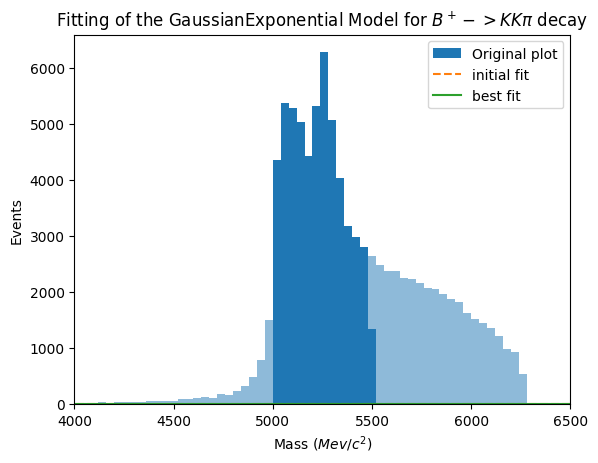

In [ ]:
from lmfit.models import GaussianModel, ExponentialModel, LorentzianModel
from scipy.optimize import curve_fit

events, mass, var = plt.hist(mass_mother_finfin_plusKKP, 250, (0,10000), label = "Original plot")

gaussian_mod = GaussianModel(prefix='gaussian_')
exponential_mod = ExponentialModel(prefix='exponential_')

# Set initial parameter guesses
gaussian_pars = gaussian_mod.make_params(amp_gauss=5000, cen_gauss=5280, sigma_gauss=3.2)
exponential_pars = exponential_mod.make_params(amp_exp=100, decay_exp=0.001)

# Combine models
mod = gaussian_mod + exponential_mod

# Combine parameters
pars = gaussian_pars + exponential_pars

# Fit the model to the data
out = mod.fit(events, pars, x=mass[:-1])

plt.hist(mass_mother_Cut_plusKKP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Print fit report
#print(out.fit_report())

#plt.plot(mass[:-1], out.eval_components()['gaussian_'], '--', color='black', label="Total fit")
#plt.plot(mass[:-1], out.eval_components()['exponential_'], '--', color='red', label="Total fit")

plt.plot(mass[:-1], out.init_fit, '--', label='initial fit')
plt.plot(mass[:-1], out.best_fit, '-', label='best fit')

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^+ ->KK\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(4000,6500)
plt.show()

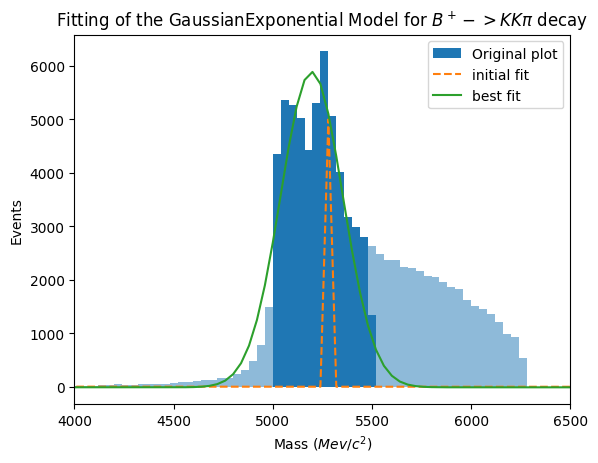

The yields are: 6105791.276587441


In [ ]:
#GaussianExponential model fitting
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import Model

# Define a custom model that combines Gaussian and Exponential components
def gaussian_exponential(x, amp_gauss, cen_gauss, sigma_gauss, amp_exp, decay_exp):
    gauss = amp_gauss * np.exp(-(x - cen_gauss)**2 / (2 * sigma_gauss**2))#(amp_gauss * np.exp(-(x-cen_gauss)/sigma_gauss))
    exp = (amp_exp * np.exp((-decay_exp)*x))
    return gauss + exp

# Define the GaussianExponential model using the custom function
gaussian_exponential_model = Model(gaussian_exponential)

# Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_finfin_plusKKP, 250, (0, 10000), label="Original plot")

# Setting initial guesses for the parameters
params = gaussian_exponential_model.make_params(x = mass[:-1], amp_gauss=5000, cen_gauss=5280, sigma_gauss=3.2, amp_exp=100, decay_exp=0.001)

# Fitting the data to the GaussianExponential model using the parameters
out = gaussian_exponential_model.fit(events, params, x=mass[:-1])

# Plotting the original data
plt.hist(mass_mother_Cut_plusKKP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Plotting the Gaussian and Exponential components
#plt.plot(mass[:-1], result.eval_components()['gaussian_exponential'], '--', color='black', label="Total fit")
plt.plot(mass[:-1], out.init_fit, '--', label='initial fit')
plt.plot(mass[:-1], out.best_fit, '-', label='best fit')

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^+ ->KK\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(4000,6500)
plt.show()

print("The yields are: " + str(result.params['amp_gauss'].value))
fitted_yield_KKPplusGE = result.params['amp_gauss'].value

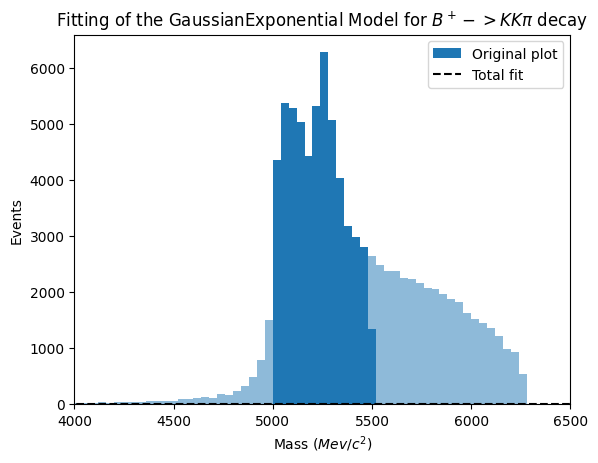

In [ ]:
#GaussianExponential model fitting
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import Model

# Define a custom model that combines Gaussian and Exponential components
def exponential(x, amp_exp, decay_exp):
    exp = (amp_exp * np.exp((-decay_exp)*x))
    return exp

# Define the GaussianExponential model using the custom function
exponential_model = Model(exponential)

# Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_finfin_plusKKP, 250, (0, 10000), label="Original plot")

# Setting initial guesses for the parameters
params = exponential_model.make_params(x = mass[:-1], amp_exp = 1000, decay_exp = 0.01)

# Fitting the data to the GaussianExponential model using the parameters
out = exponential_model.fit(events, params, x=mass[:-1])

# Plotting the original data
plt.hist(mass_mother_Cut_plusKKP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Plotting the Gaussian and Exponential components
plt.plot(mass[:-1], out.eval_components()['exponential'], '--', color='black', label="Total fit")
#plt.plot(mass[:-1], out.init_fit, '--', label='initial fit')
#plt.plot(mass[:-1], out.best_fit, '-', label='best fit')

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^+ ->KK\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(4000,6500)
plt.show()

In [ ]:
# Define the GaussianExponential model using the custom function
gaussian_exponential_model = Model(gaussian_exponential)

# Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_minusKKP, 250, (0, 10000), label="Original plot")

# Setting initial guesses for the parameters
params = gaussian_exponential_model.make_params(amp_gauss=5000, cen_gauss=5280, sigma_gauss=3.2, amp_exp=100, decay_exp=0.001)

# Fitting the data to the GaussianExponential model using the parameters
result = gaussian_exponential_model.fit(events, params, x=mass[:-1])

# Plotting the original data
plt.hist(mass_mother_Cut_minusKKP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Plotting the Gaussian and Exponential components
plt.plot(mass[:-1], result.eval_components()['gaussian_exponential'], '--', color='black', label="Total fit")

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^- ->KK\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(5000,6000)
plt.show()

print("The yields are: " + str(result.params['amp_gauss'].value))
fitted_yield_KKPminusGE = result.params['amp_gauss'].value

In [ ]:
# Define the GaussianExponential model using the custom function
gaussian_exponential_model = Model(gaussian_exponential)

# Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_plusKPP, 250, (0, 10000), label="Original plot")

# Setting initial guesses for the parameters
params = gaussian_exponential_model.make_params(amp_gauss=6280, cen_gauss=5280, sigma_gauss=3.2, amp_exp=100, decay_exp=0.001)

# Fitting the data to the GaussianExponential model using the parameters
result = gaussian_exponential_model.fit(events, params, x=mass[:-1])

# Plotting the original data
plt.hist(mass_mother_Cut_plusKPP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Plotting the Gaussian and Exponential components
plt.plot(mass[:-1], result.eval_components()['gaussian_exponential'], '--', color='black', label="Total fit")

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^+ ->K\pi\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(5000,6000)
plt.show()

print("The yields are: " + str(result.params['amp_gauss'].value))
fitted_yield_KPPplusGE = result.params['amp_gauss'].value

In [ ]:
# Define the GaussianExponential model using the custom function
gaussian_exponential_model = Model(gaussian_exponential)

# Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_minusKPP, 250, (0, 10000), label="Original plot")

# Setting initial guesses for the parameters
params = gaussian_exponential_model.make_params(amp_gauss=7280, cen_gauss=5280, sigma_gauss=3.2, amp_exp=100, decay_exp=0.001)

# Fitting the data to the GaussianExponential model using the parameters
result = gaussian_exponential_model.fit(events, params, x=mass[:-1])

# Plotting the original data
plt.hist(mass_mother_Cut_minusKPP, 250, (0, 10000), color='tab:blue', alpha=0.5)

# Plotting the Gaussian and Exponential components
plt.plot(mass[:-1], result.eval_components()['gaussian_exponential'], '--', color='black', label="Total fit")

plt.legend()
plt.title("Fitting of the GaussianExponential Model for $B^- ->K\pi\pi$ decay")
plt.xlabel("Mass ($Mev/c^2$)")
plt.ylabel("Events")
plt.xlim(4000,6500)
plt.show()

print("The yields are: " + str(result.params['amp_gauss'].value))
fitted_yield_KPPminusGE = result.params['amp_gauss'].value

In [ ]:
#Importing curve fit and the gaussian & exponential models
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel, ExponentialModel, LorentzianModel

#Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_plusKKP, 250, (0,10000), label = "Original plot")

#Creating the Gauss model
gauss_mod = GaussianModel(independant_vars = ['massg'],prefix = 'gauss_')

#naming the parameters and assigning their values
PARAMETERS = gauss_mod.make_params(center= 5280,amplitude = 7850,sigma = 3.2)

#Fitting the data to the model using the parameters
model_fitg = gauss_mod.fit(events, PARAMETERS, x=mass[:-1])

#Ploting the data and the best fit
plt.plot(mass[:-1],events,10000,color = "blue")
plt.plot(mass[:-1], model_fitg.best_fit, color = 'black', label = "Fitted plot",linestyle = '--')
plt.legend(loc = "upper right")
plt.xlim(4000,6500)
plt.ylim(0,7000)
#Adding titles
plt.title("Fitting of the Gaussian Model for $B^+ ->KK\pi$ decay")
plt.ylabel("Events")
plt.xlabel("Mass ($Mev/c^2$)")


#Printing the value of the fitted yield
print("The yields are: " + str(model_fitg.params['gauss_amplitude'].value))
fitted_yield_KKPplus = model_fitg.params['gauss_amplitude'].value

In [ ]:
#Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_minusKKP, 250, (0,10000), label = "Original plot")

#Creating the Gauss model
gauss_mod = GaussianModel(independant_vars = ['massg'],prefix = 'gauss_')

#naming the parameters and assigning their values
PARAMETERS = gauss_mod.make_params(gauss_center= 5280,gauss_amplitude = 7850,gauss_sigma = 3.3)

#Fitting the data to the model using the parameters
model_fitg = gauss_mod.fit(events, PARAMETERS, x=mass[:-1])

#Ploting the data and the best fit
plt.plot(mass[:-1], events, 10000, color = "blue")
plt.plot(mass[:-1], model_fitg.best_fit, color = 'black', label = "Fitted plot",linestyle="--")
plt.legend(loc = "upper right")
plt.xlim(4500,6250)
plt.ylim(0,6000)
#Adding titles
plt.title("Fitting of the Gaussian Model for $B^- ->KK\pi$ decay")
plt.ylabel("Events")
plt.xlabel("Mass ($Mev/c^2$)")


#Printing the value of the fitted yield
print("The yields are: " + str(model_fitg.params['gauss_amplitude'].value))
fitted_yield_KKPminus = model_fitg.params['gauss_amplitude'].value

In [ ]:
#Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_plusKPP, 250, (0,10000), label = "Original plot")

#Creating the Gauss model
gauss_mod = GaussianModel(independant_vars = ['massg'],prefix = 'gauss_')

#naming the parameters and assigning their values
PARAMETERS = gauss_mod.make_params(gauss_center= 5280,gauss_amplitude = 7840,gauss_sigma = 7.0)

#Fitting the data to the model using the parameters
model_fitg = gauss_mod.fit(events, PARAMETERS, x=mass[:-1])

#Ploting the data and the best fit
plt.plot(mass[:-1], events, 10000, color = "blue")
plt.plot(mass[:-1], model_fitg.best_fit, color = 'black', label = "Fitted plot",linestyle="--")
plt.legend(loc = "upper right")
plt.xlim(4000,6250)
plt.ylim(0,17000)
#Adding titles
plt.title("Fitting of the Gaussian Model for $B^+ ->K\pi\pi$ decay")
plt.ylabel("Events")
plt.xlabel("Mass ($Mev/c^2$)")


#Printing the value of the fitted yield
print("The yields are: " + str(model_fitg.params['gauss_amplitude'].value))
fitted_yield_KPPplus = model_fitg.params['gauss_amplitude'].value

In [ ]:
#Assigning the events and mass data from the cut mother particle mass to x & y data
events, mass, var = plt.hist(mass_mother_Cut_minusKPP, 250, (0,10000), label = "Original plot")

#Creating the Gauss model
gauss_mod = GaussianModel(independant_vars = ['massg'],prefix = 'gauss_')

#naming the parameters and assigning their values
PARAMETERS = gauss_mod.make_params(gauss_center= 5280,gauss_amplitude = 7860,gauss_sigma = 7.0)

#Fitting the data to the model using the parameters
model_fitg = gauss_mod.fit(events, PARAMETERS, x=mass[:-1])

#Ploting the data and the best fit
plt.plot(mass[:-1], events, 10000, color = "blue")
plt.plot(mass[:-1], model_fitg.best_fit, color = 'black', label = "Fitted plot",linestyle="--")
plt.legend(loc = "upper right")
plt.xlim(4000,6500)
plt.ylim(0,17000)
#Adding titles
plt.title("Fitting of the Gaussian Model for $B^- ->K\pi\pi$ decay")
plt.ylabel("Events")
plt.xlabel("Mass ($Mev/c^2$)")


#Printing the value of the fitted yield
print("The yields are: " + str(model_fitg.params['gauss_amplitude'].value))
fitted_yield_KPPminus = model_fitg.params['gauss_amplitude'].value

In [ ]:
#Asymmetry B -> Kpipi

Final_yieldKPPplus = fitted_yield_KPPplus*(1/float(PID_eff_KPPplus))*(1/float(Trig_eff_KPPplus))*(1/float(Sel_eff_KPPplus))
Final_yieldKPPminus = fitted_yield_KPPminus*(1/float(PID_eff_KPPminus))*(1/float(Trig_eff_KPPminus))*(1/float(Sel_eff_KPPminus))

Asymmetry_Kpipi = (Final_yieldKPPminus - Final_yieldKPPplus)/float(Final_yieldKPPminus + Final_yieldKPPplus)

print("The Asymmetry Value for The B -> Kpipi decay is: " + str(Asymmetry_Kpipi))

In [ ]:
#Asymmetry B -> KKpi

Final_yieldKKPplus = fitted_yield_KKPplus*(1/float(PID_eff_KKPplus))*(1/float(Trig_eff_KKPplus))*(1/float(Sel_eff_KKPplus))
Final_yieldKKPminus = fitted_yield_KKPminus*(1/float(PID_eff_KKPminus))*(1/float(Trig_eff_KKPminus))*(1/float(Sel_eff_KKPminus))

Asymmetry_KKpi = (Final_yieldKKPminus - Final_yieldKKPplus)/float(Final_yieldKKPminus + Final_yieldKKPplus)

print("The Asymmetry Value for The B -> KKpi decay is: " + str(Asymmetry_KKpi))

In [ ]:
#Dalitz plotting
#binning 8 by 8
#sqrt(m^2 + p^2)
#sqrt(signal?/(signal + backgrd) purity


import numpy as np
axlim = 1.5e9
nbin = 8
vbin = np.linspace(0, axlim, nbin + 1)

m1=cleaned_MK1_plus
m2=cleaned_MK2_plus
m3=cleaned_MP2_plus

m1 = np.array(m1)
m2 = np.array(m2)
m3 = np.array(m3)

min_length = min(len(m1.flatten()), len(m2.flatten()), len(m3.flatten()))
m1 = m1.flatten()[:min_length]
m2 = m2.flatten()[:min_length]
m3 = m3.flatten()[:min_length]

m1m2_plus = (m1 + m2)**2
m2m3_plus = (m2 + m3)**2
#color_values = norm_hist.flatten()[np.digitize(m1.flatten(), xedges) * 50 + np.digitize(m2.flatten(), yedges)]
#plt.scatter(m1m2.flatten(), m2m3.flatten(), cmap="rainbow", marker=".", alpha=0.5, s=1)
#plt.colorbar(label="event density")
#plt.xlim(0, 2e9)
#plt.ylim(0, 2e9)
#plt.xlabel("mass1&2")
#plt.ylabel("mass2&3")
#plt.title("KPiPi Dalitz Plot B+ -> Kkpi")
#plt.show()

plt.hist2d(m1m2_plus, m2m3_plus, bins=(vbin, vbin), cmap="rainbow")
plt.xlabel("mass K+ K-")
plt.ylabel("mass K- Pi+")
plt.title("Dalitz Plot $B^+ ->KK\pi$")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()

In [ ]:
#Dalitz plotting
import numpy as np
axlim = 1.5e9
nbin = 8
vbin = np.linspace(0, axlim, nbin + 1)

m1=cleaned_MK1_minus
m2=cleaned_MK2_minus
m3=cleaned_MP2_minus

m1 = np.array(m1)
m2 = np.array(m2)
m3 = np.array(m3)

min_length = min(len(m1.flatten()), len(m2.flatten()), len(m3.flatten()))
m1 = m1.flatten()[:min_length]
m2 = m2.flatten()[:min_length]
m3 = m3.flatten()[:min_length]

m1m2_minus = (m1 + m2)**2
m2m3_minus = (m2 + m3)**2

plt.hist2d(m1m2_minus, m2m3_minus, bins=(vbin, vbin), cmap="rainbow")
plt.xlabel("K- K+")
plt.ylabel("K+ Pi-")
plt.title("Dalitz Plot $B^- ->KK\pi$")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()

In [ ]:
min_length = min(len(m1m2_minus), len(m1m2_plus), len(m2m3_minus), len(m2m3_plus))

m1m2_minus = m1m2_minus[:min_length]
m1m2_plus = m1m2_plus[:min_length]
m2m3_minus = m2m3_minus[:min_length]
m2m3_plus = m2m3_plus[:min_length]

xdiff = m1m2_minus - m1m2_plus
ydiff = m2m3_minus - m2m3_plus

plt.hist2d(xdiff, ydiff, bins=(vbin, vbin), cmap="rainbow")
plt.xlabel("K K")
plt.ylabel("K Pi")
plt.title("Dalitz Plot $B ->KK\pi$ asymmetry")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()

In [ ]:
axlim = 1e9
nbin = 8
vbin = np.linspace(0, axlim, nbin + 1)

m11=cleaned_MK1_minus
m22=cleaned_MP1minus
m33=cleaned_MP2minus

m11 = np.array(m11)
m22 = np.array(m22)
m33 = np.array(m33)

min_length = min(len(m11.flatten()), len(m22.flatten()), len(m33.flatten()))
m11 = m11.flatten()[:min_length]
m22 = m22.flatten()[:min_length]
m33 = m33.flatten()[:min_length]

m1m2_minus = (m11 + m22)**2
m2m3_minus = (m22 + m33)**2
plt.hist2d(m1m2_minus, m2m3_minus, bins=(vbin, vbin), cmap="rainbow")
plt.xlabel("mass K- Pi-")
plt.ylabel("mass Pi- Pi+")
plt.title("Dalitz Plot $B^- ->K\pi\pi$")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()

In [ ]:
axlim = 1e9
nbin = 8
vbin = np.linspace(0, axlim, nbin + 1)

m1kpp=cleaned_MK1_plus
m2kpp=cleaned_MP1plus
m3kpp=cleaned_MP2plus

m1kpp = np.array(m1kpp)
m2kpp = np.array(m2kpp)
m3kpp = np.array(m3kpp)

min_length = min(len(m1kpp.flatten()), len(m2kpp.flatten()), len(m3kpp.flatten()))
m1kpp = m1kpp.flatten()[:min_length]
m2kpp = m2kpp.flatten()[:min_length]
m3kpp = m3kpp.flatten()[:min_length]

m1m2_plus = (m1kpp + m2kpp)**2
m2m3_plus = (m2kpp + m3kpp)**2
plt.hist2d(m1m2_plus, m2m3_plus, bins=(vbin, vbin), cmap="rainbow")
plt.xlabel("Pi- Pi+")
plt.ylabel("K+ Pi+")
plt.title("Dalitz Plot $B^+ ->K\pi\pi$")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()

In [ ]:
min_length = min(len(m1m2_minus), len(m1m2_plus), len(m2m3_minus), len(m2m3_plus))

m1m2_minus = m1m2_minus[:min_length]
m1m2_plus = m1m2_plus[:min_length]
m2m3_minus = m2m3_minus[:min_length]
m2m3_plus = m2m3_plus[:min_length]

xdiff = m1m2_minus - m1m2_plus
ydiff = m2m3_minus - m2m3_plus

plt.hist2d(xdiff, ydiff, bins=(vbin, vbin), cmap="rainbow")
plt.xlabel("Pi Pi")
plt.ylabel("K Pi")
plt.title("Dalitz Plot $B ->K\pi\pi$ asymmetry")
plt.colorbar()
plt.xlim(0, axlim)
plt.ylim(0, axlim)
plt.show()